In [1]:
!python --version

Python 2.7.10 :: Anaconda 2.4.0 (64-bit)



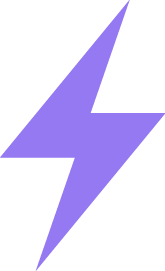

Connected to server at https://desolate-castle-4773.herokuapp.com


<IPython.core.display.Javascript object>

In [290]:
import logging, gensim, bz2
from gensim import corpora, models, similarities
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
import string
import itertools
import random
exclude = set(string.punctuation)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 18.0)
import numpy as np
from lightning import Lightning
from numpy import random, asarray
import networkx as nx
from __future__ import division
import math
import random
import pickle
lgn = Lightning(ipython=True, host='https://desolate-castle-4773.herokuapp.com/')
lgn.set_size(size='large')

In [293]:
topic_names = pickle.load( open( "topics_names.p", "rb" ) )

# Load text

In [4]:
def loadText(path):
    soup = BeautifulSoup( open(path), 'lxml')
    s = ' '
    for string in soup.find_all("source"):
        s += ' ' + string.string
    return s

In [5]:
text = loadText(u"all_source_texts/Turkish_Basketball_Clubs_Evaluationprogramme15-16_Repucom_150612_Übersetzten-en-tr-T.mxliff")

# tokenize

In [6]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from stemming.porter2 import stem
    
def tokenize(text):
    text = text.lower()
    # tokenize + punctuation
    from nltk.tokenize import RegexpTokenizer
    tokenizer = RegexpTokenizer(r'\w+') # remove punctuation
    text = tokenizer.tokenize(text)
    # remove stopwords
    from nltk.corpus import stopwords
    stops = stopwords.words('english')
    text = [ w for w in text if w.lower() not in stops]
    # Exclude numbers
    text = [s for s in text if not re.search(r'\d',s)]
    #remove word with less than 3letters
    text = [s for s in text if len(s) > 2]
    # stemmer
    lmtzr = WordNetLemmatizer()
#     stemmer = SnowballStemmer("english")
    text =  [(lmtzr.lemmatize(t)) for t in text] 
    return text

In [7]:
tokens =  tokenize(text)

# load all texts

In [8]:
import os
import sys
filelist = []
root = u"all_source_texts/"
for filename in os.listdir(root):
    filename = root + filename
    filelist .append(filename.encode(sys.getfilesystemencoding()))

i = 0
corpus_tokens = {}
for f in filelist:
    corpus_tokens[f] = tokenize(loadText( f ))
    i += 1


# Load LDA

In [9]:
lda = gensim.models.ldamodel.LdaModel.load(u'lda/wikipedia_lda', mmap='r')

# make dictionary

In [10]:
corpus = { f:lda.id2word.doc2bow(corpus_tokens[f]) for f in corpus_tokens}

# update lda 

In [11]:
lda.update( corpus.values())

In [12]:
# dictionary.save('dict_corpus')

In [13]:
for f in filelist:
    topic = lda.get_document_topics(corpus[f])
    print(f + "  " + str(sum([ s[1] for s in topic])) )

all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_ STICKERS SECTION 5-en-fr_ca-CR.mxliff  0.990408163082
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 1-en-fr_ca-CR.mxliff  0.9703125
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 3-en-fr_ca-CR.mxliff  0.968333333333
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 4-en-fr_ca-CR.mxliff  0.982222222222
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 6-en-fr_ca-CR.mxliff  0.955454545455
all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOU_ STICKERS SECTION 2-en-fr_ca-CR.mxliff  0.966551724138
all_source_texts/1844-0001 Mega Giant S&A Dinosaurs UK AMENDED-en-fr_ca-CR.mxliff  0.948320860235
all_source_texts/1844-0001 MEGA S&A Dinosaurs PLC V4-en-fr_ca-CR.mxliff  0.987123287671
all_source_texts/1920-0001 Fairy Interiors-en-fr_ca-CR.mxliff  0.964234913693
all_source_tex

# get topic distribution from a text

In [14]:
def topicsFromFiles( path ):
    tokens = tokenize(loadText( path ))
    bow = lda.id2word.doc2bow( tokens )
    return lda.get_document_topics(bow)

In [15]:
f = random.choice(filelist)
topicsFromFiles(f)

[(2, 0.028115050659294819),
 (18, 0.13206078351803596),
 (25, 0.016107270027376819),
 (40, 0.067292302029488285),
 (49, 0.015603791211382076),
 (57, 0.10418218138643615),
 (63, 0.019873943395692102),
 (65, 0.16762928374900724),
 (72, 0.35320145788462765),
 (78, 0.015297735778257118),
 (83, 0.013316169237655216)]

# store topics words

In [16]:
# translate the lda topics in dictionnaries
i = 0
n = 100 # number of words per topics
topics = dict()
wordset = set()
for i in range(0,100):
    a = lda.print_topic(i, n)
    topic = dict()
#     print a
    pairs = a.split( ' + ')
    for p in pairs:
        pair = p.split('*')
#         print pair[0]
        value = float(pair[0])
        key = unicode(pair[1])
        topic[key] = value
        wordset.add(key)
    topics[i] = topic   
    i += 1

# show topic as a bag of words

In [202]:
import PIL
from PIL import Image
from os import path
from wordcloud import WordCloud
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def WordCloudTopic( i ):
    # Generate a word cloud image
    wc = WordCloud(background_color="white", max_words=2000,
               max_font_size=40, random_state=42)
    wordcloud = wc.generate_from_frequencies(topics[i].items())    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def printCloud( frequencies, imagePath = "image.jpg" ):
    # Read the whole text.

    # Read the whole text.
#     text =" ".join(all_words) #open(path.join(d, 'alice.txt')).read()
#     print "text joined"

    # read the mask / color image
    # taken from http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
    alice_coloring = np.array(Image.open(imagePath))

    wc = WordCloud(background_color="white", max_words=200, mask=alice_coloring,
                   stopwords=STOPWORDS.add("said"),
                   max_font_size=300)
    # generate word cloud
    wc.generate_from_frequencies(frequencies)

    # create coloring from image
    image_colors = ImageColorGenerator(alice_coloring)

    # show
    # plt.imshow(wc)
    # plt.axis("off")
    # plt.figure()
    # recolor wordcloud and show
    # we could also give color_func=image_colors directly in the constructor
    plt.imshow(wc.recolor(color_func=image_colors))
    plt.axis("off")
    plt.figure()
    # plt.imshow(alice_coloring, cmap=plt.cm.gray)
    # plt.axis("off")
    plt.show()

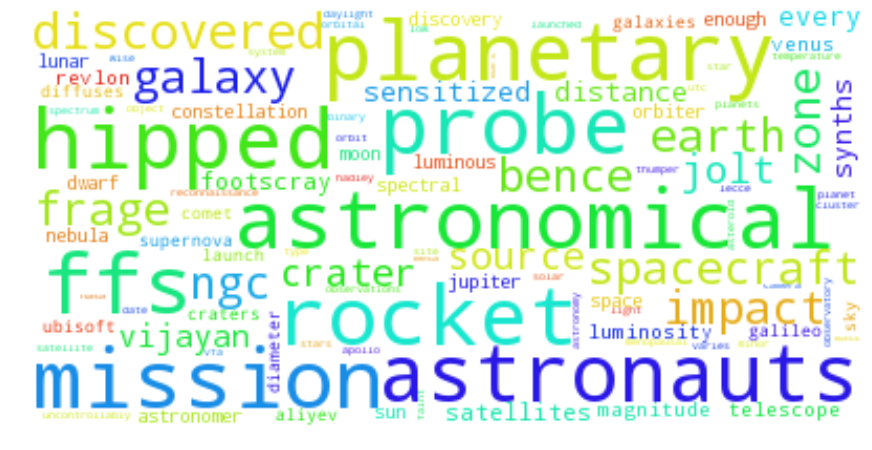

In [203]:
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
WordCloudTopic(0)

# get the topic and the score for a unique word

In [188]:
def getTopicFromWord( unique_word ):
    bow = lda.id2word.doc2bow( [unique_word] )
    topic = lda.get_document_topics(bow)
    if len(topic):
        return topic[0][0]
    else:
        return None


print getTopicFromWord('have')

None


In [189]:
from scipy.sparse import *
from scipy import *
V = dok_matrix((0,100), dtype=float32)

def getTopic_n_topWordsWithinTopics( path ):
    tokens = tokenize(loadText( path ))
    bow = lda.id2word.doc2bow( tokens )
    topics =  lda.get_document_topics(bow)
    complex_topic = dict()
    complex_topic['topics'] = topics
    details = dict()
    max_details = 0
    for t in tokens:
        i = getTopicFromWord( t )
        if i != None:
            if i not in details.keys():
                details[i]  = dict()
            if t not in details[i].keys():
                details[i][t] = 1
            else:
                details[i][t] += 1
                if details[i][t] > max_details:
                    max_details = details[i][t]
                
    V = dok_matrix((1,100), dtype=float32)
    for t in topics:
        V[0,t[0]] = t[1]
    
    complex_topic['semantic_vector'] = V
    complex_topic['details'] = details
    complex_topic['max_details'] = max_details
    return complex_topic


In [279]:
# complex_topics = dict()
# for f in filelist:
#     complex_topics[f] = getTopic_n_topWordsWithinTopics(f)
    
pickle.dump( complex_topics, open( "topics_from_files.p", "wb" ) )

complex_topics = pickle.load( open( "topics_from_files.p", "rb" ) )

In [285]:
print loadText(f)

  [Product IQ – Quiz 1] Content Object Headline: Do you know your skincare ABCs? Content Object Introduction: Test your product IQ on our bestselling “alphabet cremes.” Copy Block: 1. Q. A customer asks what makes our DayWear Anti-Oxidant Beauty Benefit Creme different from all other BB cremes. What would you tell her? A. “Ours is an {i>Allure <i}magazine Best of Beauty award winner, so it’s recognized as one of the best!” B. “Like most BB cremes, ours has SPF protection, but it also offers anti-oxidant protection, meaning it helps to guard against damage from free radicals throughout the day.” C. “It’s oil-free and also helps to minimize excess oil.” D. All of the above E. None of the above 2. Q. What is the difference between DayWear BB and Double Wear BB? A. They are mostly the same, but Double Wear BB has more coverage. B. DayWear BB is slightly more effective because it has a higher SPF. C. Double Wear BB is our first long-wearing BB makeup, offering the most coverage, while DayWe

# display main topics and the top words from the text within a topic

In [284]:
f = random.choice(filelist)
print f
x = complex_topics[f]
x_topics = x['topics']
x_details = x['details']
for i in sorted(x_topics, key=lambda tup: tup[1], reverse = True):
    print "score: %s " %i[1] + "| topic: %s" %topic_names[i[0]] + " | id topic: %s" %i[0]
    d = x_details[i[0]]
    for w in sorted(d, key=d.get, reverse=True)[:10]:
        print "-----  " + str(w) + ": " + str(d[w])

all_source_texts/Product IQ Quizzes v2-en-da-T.mxliff
score: 0.292475275644 | topic: positive words- marketing | id topic: 78
-----  help: 3
-----  sheer: 2
-----  make: 2
-----  true: 2
-----  even: 1
-----  kissed: 1
-----  asks: 1
-----  look: 1
-----  headline: 1
-----  come: 1
score: 0.190306137078 | topic: nutrition | id topic: 89
-----  oil: 6
-----  acne: 5
-----  radical: 2
-----  creates: 2
-----  tint: 2
-----  enhances: 1
-----  gently: 1
-----  excess: 1
-----  naturally: 1
-----  higher: 1
score: 0.172155928862 | topic: IT | id topic: 72
-----  customer: 5
-----  content: 3
-----  search: 1
-----  option: 1
-----  offer: 1
-----  product: 1
-----  different: 1
-----  select: 1
-----  provides: 1
-----  copy: 1
score: 0.115474269618 | topic: human ressources | id topic: 81
-----  difference: 3
-----  sheer: 2
-----  correct: 1
-----  different: 1
-----  clear: 1
-----  quiz: 1
-----  allure: 1
-----  virtually: 1
-----  apply: 1
-----  true: 1
score: 0.0650556993687 | topi

# similarity

In [23]:
def norm(v):
    s = 0
#     it = v.itervalues()
#     while it:
#         s+= it
#         it.next()
    for d in v.itervalues():
        s+= d**2
    return sqrt(s)

def similarity( a, b):
    # cosine similarity
    p = (a.dot(b.transpose()) / (norm(a) * norm(b))).data
    if len(p):
        return p[0]


def closestFile( path ):
    x = getTopic_n_topWordsWithinTopics(path)
    u = x['semantic_vector']
    print type(u)
    similarities = dict()
    for s in complex_topics:
        v = complex_topics[s]['semantic_vector']
        similarities[s] = similarity(v,u)     
    k = 1
    for i in sorted(similarities.items(), key=lambda x: x[1])[::-1][:15]:
        print str(k) + "  |  "  + str(i)
        k += 1
        
    return similarities

In [24]:
path = u"all_source_texts/Turkish_Basketball_Clubs_Evaluationprogramme15-16_Repucom_150612_Übersetzten-en-tr-T.mxliff"
closestFile( path )

<class 'scipy.sparse.dok.dok_matrix'>
1  |  ('all_source_texts/Turkish_Basketball_Clubs_Evaluationprogramme15-16_Repucom_150612_\xdcbersetzten-en-tr-T.mxliff', 0.99999998384827371)
2  |  ('all_source_texts/ilv_presentation_v13.7_141111_ey_ds-2-en-zh-T.mxliff', 0.94104756039196535)
3  |  ('all_source_texts/900 GB_Company Profile_2015-en-ru-T.mxliff', 0.91025325279068259)
4  |  ('all_source_texts/TS-2S iv-EU 3 FEB 2015 WORD-en-nl-T.mxliff', 0.90790645906006995)
5  |  ('all_source_texts/291 GB_ImageBrochure_Petfood_2014-en-ru-T.mxliff', 0.90708566671962343)
6  |  ('all_source_texts/Vores ansvar_en-GB-en-it-T.mxliff', 0.90283241233364497)
7  |  ('all_source_texts/russian_name.mxliff', 0.89755860181231495)
8  |  ('all_source_texts/292 GB_ImageBrochure_Aqua_2014-en-ru-T.mxliff', 0.88981555320348971)
9  |  ('all_source_texts/Vision & Mission2_en-GB-en-it-T.mxliff', 0.88597364851412375)
10  |  ('all_source_texts/Text variables for on-screen feedback_Final[1]-en-fr-T.mxliff', 0.8829048838065188

{'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_ STICKERS SECTION 5-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 1-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 3-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 4-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 6-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOU_ STICKERS SECTION 2-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844-0001 MEGA S&A Dinosaurs PLC V4-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1844-0001 Mega Giant S&A Dinosaurs UK AMENDED-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1920-0001 Fairy Interiors-en-fr_ca-CR.mxliff': None,
 'all_source_texts/1920-0001 Fairy PLC-en-fr_ca-CR.mxliff': 0.1

In [25]:
path = u"all_source_texts/1920-0002 Princess Interiors-en-fr_ca-CR.mxliff"
closestFile( path )

<class 'scipy.sparse.dok.dok_matrix'>
1  |  ('all_source_texts/1920-0002 Princess Interiors-en-fr_ca-CR.mxliff', 0.99999992064442966)
2  |  ('all_source_texts/1920-0001 Fairy Interiors-en-fr_ca-CR.mxliff', 0.96594813680534419)
3  |  ('all_source_texts/ELX Weekly Wellness Tips v3-en-da-T.mxliff', 0.89673670619728829)
4  |  ('all_source_texts/Beth\xb9s Blog 2 v1-en-da-T.mxliff', 0.87466348773270619)
5  |  ('all_source_texts/Beth\xb9s Blog 3 v3-en-da-T.mxliff', 0.84882606513205994)
6  |  ('all_source_texts/Beth\xb9s Blog 1 v3-en-da-T.mxliff', 0.84467506674468507)
7  |  ('all_source_texts/EL GMTC_Final Translation Template (2)_deadline 20. april-en-da-T.mxliff', 0.84145725796495485)
8  |  ('all_source_texts/Best of the Best Weekly Tips v4-en-da-T.mxliff', 0.83444950878201563)
9  |  ('all_source_texts/Salesfolder Revlonissimo-en-de-T.mxliff', 0.81446515153268595)
10  |  ('all_source_texts/Welcome Video Script_Final Translation Template_deadline 13. march-en-da-T.mxliff', 0.80308854358754045

{'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_ STICKERS SECTION 5-en-fr_ca-CR.mxliff': 0.051692369027548805,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 1-en-fr_ca-CR.mxliff': 0.121410065964407,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 3-en-fr_ca-CR.mxliff': 0.24028621749501333,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 4-en-fr_ca-CR.mxliff': 0.33133772706281384,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOUT_STICKERS SECTION 6-en-fr_ca-CR.mxliff': 0.61830177846405054,
 'all_source_texts/1844 0010 S&A MY BIG BOOK OF STICKER FUN PRESSOU_ STICKERS SECTION 2-en-fr_ca-CR.mxliff': 0.13239743710559959,
 'all_source_texts/1844-0001 MEGA S&A Dinosaurs PLC V4-en-fr_ca-CR.mxliff': 0.15695251464437024,
 'all_source_texts/1844-0001 Mega Giant S&A Dinosaurs UK AMENDED-en-fr_ca-CR.mxliff': 0.3294094117177726,
 'all_source_text

# display the results as a graph

In [244]:
TRESHOLD = 2
min_score = 0.03 #5%

colours = []
colours.append( (26, 188, 156))
colours.append( (52, 152, 219))
colours.append( (155, 89, 182))
colours.append( (241, 196, 15))
colours.append( (231, 76, 60))
colours.append( (46, 204, 113))
colours.append( (230, 126, 34))
colours.append( (149, 165, 166))
colours.append( (52, 73, 94))

class idGenerator:
    def __init__(self):
        self.id = 0
    def get(self):
        self.id += 1
        return self.id - 1
    
    
class node:
    def __init__(self, index, label, weight = 30., color = (236, 240, 241)):
        self.index = index
        self.label = label
        self.childs = []
        self.weight = weight
        self.connections = None
        self.groups = []
        self.color = color
    def addChild( self, c ):
        self.childs.append( c )
        
    def getGraph(self):
        self.connections = []
        self.groups.append(0)
        graph = nx.Graph()
        graph.add_node( self.index, weight = self.weight, label = self.label, color = self.color)
        k = 0
        for c in self.childs: 
            color = colours[k]
            group = []
            k+=1
            if k >= len(colours):
                k = 0
            self.groups.append( k )
            graph.add_node( c.index, weight = c.weight, label = c.label, color = c.color)
            graph.add_edge(self.index, c.index )
            self.connections.append([ self.index, c.index, 0.1 ])
            for cc in c.childs:
                graph.add_node( cc.index, weight = cc.weight, label = cc.label, color = cc.color)
                graph.add_edge(c.index, cc.index )
                self.connections.append([ c.index, cc.index, 0. ])
                self.groups.append( 0 )
        return graph
    
    def getPos(self, sizeX = 5, sizeY = 15):
        X = []
        Y = []
        X.append(0)
        Y.append(  sizeY/2 )
        n = len(self.childs)
        cur = 0
        offset = 0.5
        for i in range(0, n):   
            c = self.childs[i]
            m = len(c.childs)
            w = c.weight
            X.append(3 * sizeX / 5)
            Y.append( cur  )
            offsetY = w * sizeY
            for j in range(0,m):
                # set word nodes position
                X.append( sizeX )# + 0.5* math.cos( 2 * 3.12 * j / m) )
                Y.append( cur + offset +  j/m * w * (sizeY - offset) - offsetY / 2)#+ 0.5 * math.sin( 2 * 3.12 * j / m))
            
            # set topics nodes postions
            cur += offsetY
            
        Y = [ sizeY - y for y in Y]      
        return X,Y
    
def makeGraphFromText( f ):
    id = idGenerator()
    x = complex_topics[f]
    x_topics = x['topics']
    x_details = x['details']
    max_details = x['max_details']
    text_node = node( id.get() , f)
    k = 1
    for i in sorted(x_topics, key=lambda tup: tup[1], reverse = True):
        if i[1] > min_score:
            color = colours[k]
            k+=1
            if k >= len(colours):
                k = 0
            topic_node = node( id.get(), topic_names[i[0]], weight = 50 * i[1], color = color )
            d = x_details[i[0]]
            # add words from text
            for w in sorted(d, key=d.get, reverse=True)[:10]:
                if d[w] > 1:
                    detail_node = node( id.get(), str(str(w) + ": " +  str(d[w])), weight =  18 * float(d[w]) / float(max_details))
                    topic_node.addChild(detail_node)
            # add words from topics
            for w in sorted(topics[i[0]], key=topics[i[0]].get, reverse=True)[:20]: 
                detail_node = node( id.get(), str(str(w) + ": " +  str(topics[i[0]][w])), weight =  300 * float(topics[i[0]][w]), color = color )
                topic_node.addChild(detail_node)

            text_node.addChild( topic_node )
            
    return text_node

In [247]:
# https://desolate-castle-4773.herokuapp.com/sessions/

f = random.choice(filelist)
G = makeGraphFromText( f )

print f
graph = G.getGraph()
connections = G.connections
groups = G.groups
X,Y = G.getPos(2 , 30)
mat = asarray(nx.adjacency_matrix(graph).todense())
weights =  nx.get_node_attributes(graph, 'weight').values()
labels = nx.get_node_attributes(graph, 'label').values()
colors = nx.get_node_attributes(graph, 'color').values()
colors = np.vstack(colors)

lgn.force(mat, size = weights, labels = labels, color = colors)

all_source_texts/Sprout blyanten_en-GB-en-it-T.mxliff


# topic distribution along a text

In [193]:
def split_seq(seq, num_pieces):
    start = 0
    for i in xrange(num_pieces):
        stop = start + len(seq[i::num_pieces])
        yield seq[start:stop]
        start = stop
        
def getTopicsDistributionWithinTheText(path, words = 300 ):
    text = loadText(path)
    tokens = tokenize(text)
    steps = int(len(tokens) / words)
    if steps < 2:
        steps = 2
    bow = lda.id2word.doc2bow(tokens)
    global_scores = lda.get_document_topics(bow)
    scores = dict()
    for i in sorted(global_scores, key=lambda tup: tup[1], reverse = True):
        if i[1] > min_score:
            scores[i[0]] = []
    chunks = split_seq(tokens, steps)
    i = 1
    for c in chunks:
        bow = lda.id2word.doc2bow(c)
        score = lda.get_document_topics(bow)
        for s in score:
            if s[0] in scores.keys():
                scores[s[0]].append(s[1])
                
        for s in scores:
            if len(scores[s]) < i:
                scores[s].append(0)
        i += 1
        
    return scores, global_scores
    

all_source_texts/babyshop texter vecka 33-4 (328-353)-en-da-T.mxliff


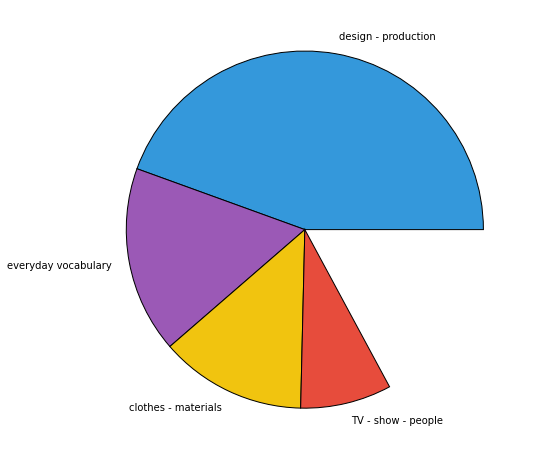

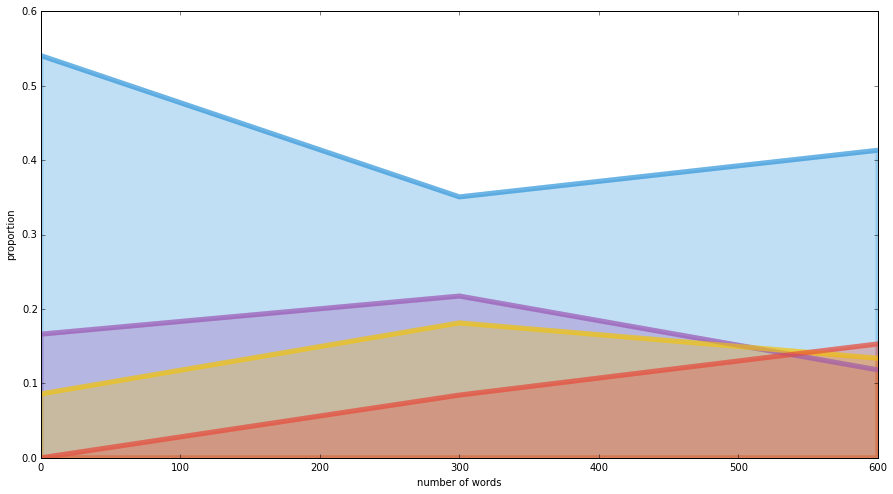

In [194]:
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d

print f

def displayTopicsDistributionWithinTheText(f, chunk_length = 300):

    distribAlongText, global_scores = getTopicsDistributionWithinTheText(f, chunk_length)

    global_scores =  sorted(global_scores, key=lambda tup: tup[1], reverse = True)
    scores = []
    for g in global_scores:
        if g[0] in distribAlongText.keys():
            scores.append( distribAlongText[g[0]])
    k = 1
    
    # draw pie chart
    values = []
    labels = []
    for s in global_scores:
        if s[1] > min_score:
            values.append(s[1])
            labels.append(topic_names[s[0]])
    matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)  
    plt.pie(values,  labels=labels, colors = [ [1.0 / 255.0 * c for c in cc] for cc in colours[1:]])
    plt.show()
    matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)
    # print type(scores)
    x = range( 0, len(scores[0]))
    x = [ chunk_length * i for i in x]
    for s in scores:
#         xnew = np.arange(min(x), max(x))
#         ynew = interpolate.splev(xnew,tck,der=0)
#         fun = interp1d(x, s, kind='cubic')
    #     plt.plot(xnew, fun(xnew),linewidth = 5, color = [ 1.0 / 255.0 * c for c in colours[k]], alpha = 0.6)
    #     plt.plot(xnew, ynew,linewidth = 5, color = [ 1.0 / 255.0 * c for c in colours[k]], alpha = 0.6)
        plt.plot(x, s,linewidth = 5, color = [ 1.0 / 255.0 * c for c in colours[k]], alpha = 0.6)
        plt.fill_between(x, s,linewidth = 5, color = [ 1.0 / 255.0 * c for c in colours[k]], alpha = 0.3)
        k += 1
        if k >= len(colours):
            k = 0

    plt.ylabel('proportion')
    plt.xlabel('number of words')
    plt.show()
    
displayTopicsDistributionWithinTheText(f, 300)

# Complex words

In [204]:
def getlongwords( path ):
    text = loadText(path)
    tokens = tokenize(text)
    f = nltk.FreqDist(tokens)
    result = dict()
    tokens = sorted(set(tokens), key=lambda w: len(w), reverse = True)
    for w in sorted(set(tokens), key=lambda w: len(w), reverse = True)[:15] :
        print w + ": " +  str(f[w])
        
    return tokens
 
# path = u"all_source_texts/1920-0002 Princess Interiors-en-fr_ca-CR.mxliff"
path = u"all_source_texts/Turkish_Basketball_Clubs_Evaluationprogramme15-16_Repucom_150612_Übersetzten-en-tr-T.mxliff"

r = getlongwords( path )

representative: 1
amplification: 1
understanding: 3
effectiveness: 1
demonstrating: 1
extrapolation: 1
extrapolated: 1
intelligence: 1
segmentation: 1
benchmarking: 1
satisfaction: 1
introduction: 1
proposition: 1
requirement: 1
sponsorship: 20


# construct a corpus to compute frequencies

In [196]:
import nltk
from nltk.corpus import reuters
# print  "corpus with: %s words (%s distincts) " %(len(reuters.words()), len(set(reuters.words())))

# freq_english = nltk.FreqDist(reuters.words())

corpus with: 1720901 words (41600 distincts) 


In [197]:
freq_english["satisfaction"]

6

In [239]:
def getMostSignificativeWords( path ):
    text = loadText(path)
    tokens = tokenize(text)
    f = nltk.FreqDist(tokens)
    word_set = set(tokens)
    result = dict()
    for w in word_set:
        score = len(w)  / np.log(2 +  freq_english[w])
        result[w] = score
    return result

def CloudFromSignificantWords( path, img_path ):
    words = getMostSignificativeWords(path)
    items = []
    for w in sorted(words, key=words.get, reverse=True)[:100]:
        items.append( (w, words[w]))
    printCloud( items, img_path )

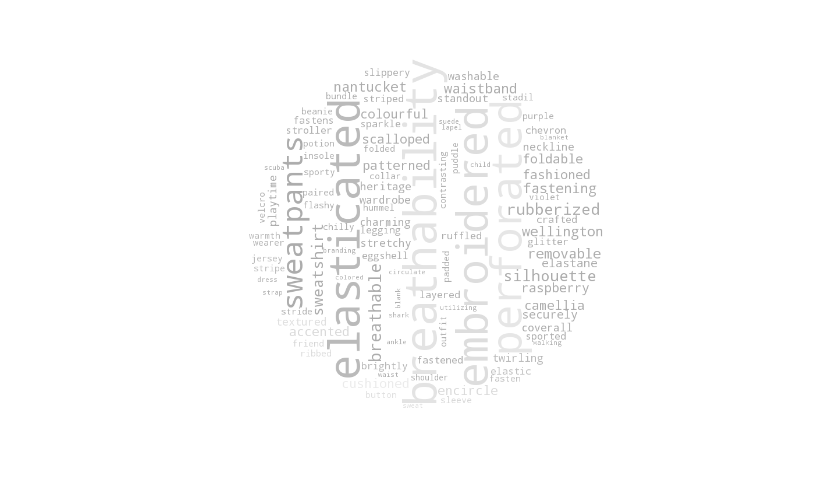

In [257]:
# mostSignificative = getMostSignificativeWords(path)
# for w in sorted(mostSignificative, key=mostSignificative.get, reverse=True)[:10]:
#     print  str(w) + ": " + str(mostSignificative[w])

CloudFromSignificantWords(path, "image.jpg")

# text complexity

In [ ]:
# https://pypi.python.org/pypi/textstat/

from textstat.textstat import textstat

difficulties = dict()
for f in filelist:
    txt = unicode(loadText(f))
    try:
        difficulties[f] = textstat.automated_readability_index((txt))
    except:
        print "fail:" + str(f)
        
print textstat.automated_readability_index((f))
print loadText(f)

In [ ]:
plt.fill_between(range(0,len(difficulties)),sorted(difficulties.values(), reverse = True), color = [ 1.0 / 255.0 * c for c in colours[0]], alpha = 0.6)

# Test all on a text

In [323]:
path = u"all_source_texts/babyshop texter vecka 33-en-fi-T.mxliff"
# path = u"all_source_texts/Re-Nutriv Script_Final Translation Template_deadline 20. april-en-da-T.mxliff"
path = random.choice(filelist)
print loadText(path)

  User Manual ERS ROLLERDRIVE CONVEYOR ERS51 Manufacturer Easy Conveyors Collse Heide 44 5674 VN Nuenen The Netherlands Tel. +31402838319 Fax +31402835999 www.easy-conveyors.com info@easy-conveyors.com Copyright for this manual Easy Conveyors holds the copyright on this manual. The manual contains standards, drawings and illustrations which may not be disclosed, published or duplicated, either fully or in part, not used for any other purpose than the installation referred to in this manual, without the prior written consent of Easy Conveyors. Content{1}s {1} {1}{2}General Safety{3} Instruction Key to Symbols Caution For your personal safety please precisely observe the working and operating procedures. Warning Observe all instructions and procedures, in order to maintain your plant in perfect condition. Note In order to keep the machine in working order, observe precisely all technical requirements for appropriate handling of the machine. Additional information Helps you to make optimu

mingningful words


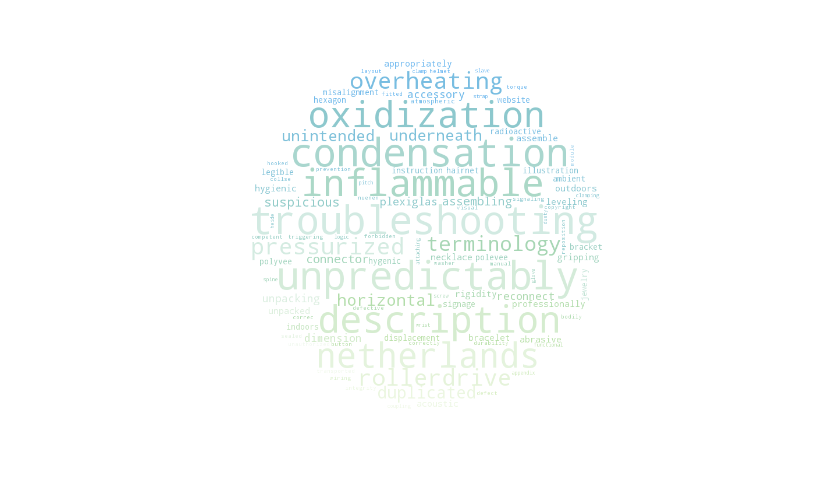

topic distribution


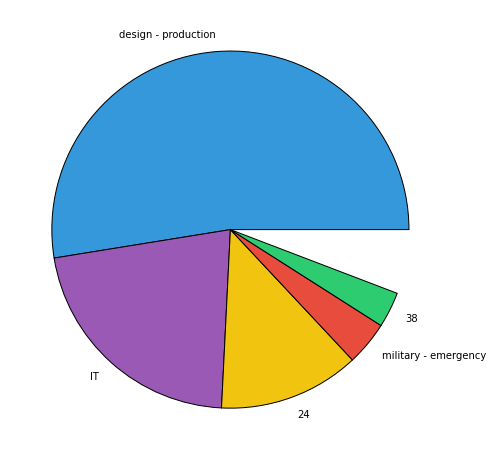

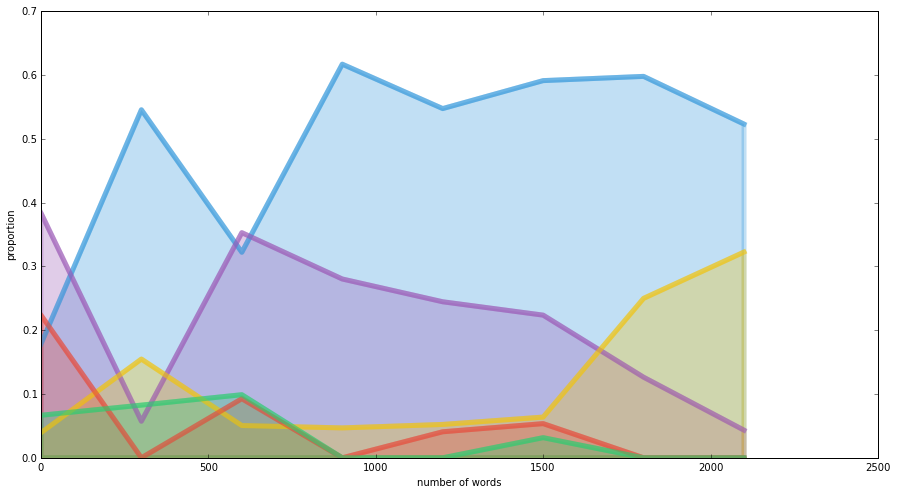

In [325]:
print "mingningful words"
CloudFromSignificantWords(path, "image_gradient.jpg")
print "topic distribution"
displayTopicsDistributionWithinTheText(path, 300)

In [326]:
# path = u"all_source_texts/babyshop texter vecka 33-en-fi-T.mxliff"
# path = u"all_source_texts/Re-Nutriv Script_Final Translation Template_deadline 20. april-en-da-T.mxliff"
G = makeGraphFromText( path )

print "topic graph"
print path
graph = G.getGraph()
connections = G.connections
groups = G.groups
X,Y = G.getPos(2 , 30)
mat = asarray(nx.adjacency_matrix(graph).todense())
weights =  nx.get_node_attributes(graph, 'weight').values()
labels = nx.get_node_attributes(graph, 'label').values()
colors = nx.get_node_attributes(graph, 'color').values()
colors = np.vstack(colors)

lgn.force(mat, size = weights, labels = labels, color = colors)





topic graph
all_source_texts/ERS 51 - User Manual - 1.1-en-de-T.mxliff


In [ ]:
# mostSignificative = getMostSignificativeWords(path)
# for w in sorted(mostSignificative, key=mostSignificative.get, reverse=True)[:30]:
#     print  str(w) + ": " + str(mostSignificative[w])
    
# drawNX(graph)

# trash

In [39]:
# draw graph with networkX


def drawNX(graph):
    i = 0
    matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)
    labelsNX = dict()
    for l in labels:
        labelsNX[i] = l
        i += 1

    i = 0
    weightsNX = dict()
    for l in weights:
        weightsNX[i] = l
        i += 1

    pos=nx.spring_layout(graph)
    nx.draw(graph, labels = labelsNX,pos = pos, edge_color = 'gray', node_color  = [ [(1.0/255.0) * cc for cc in c]  for c in colors], node_size  = [ 80 * w for w in weights], alpha = 0.7, font_size = 18)
    plt.show()

In [ ]:
# graph bundle
# from numpy import random, ceil, array
# import numpy as np
# x = random.randn(10)
# y = random.randn(10)
# mat = random.rand(10,10)
# mat[mat>0.75] = 0

# mat = np.zeros((len(connections), 3))
# # lgn = Lightning(ipython=True, host='http://public.lightning-viz.org')
# # lgn.set_size(size='large')
# print len(x)
# print len(connections)
# for i in range( 0, len(connections)):
#     mat[i,0] = connections[i][0]
#     mat[i,1] = connections[i][1]
#     mat[i,2] = connections[i][2]
    
# mat2 = np.ones((len(X), len(Y)) )
# # print mat2
# # print X
# # print Y

# lgn.graphbundled(X,Y,  mat, size = weights, labels = labels, color = colours)




In [ ]:
freqs = nltk.FreqDist(nltk.corpus.gutenberg.words())
    
printCloud( freqs.most_common(500), "image.jpg")

In [317]:
sorted(topics[94].items(), key=lambda x: x[1],reverse = True)

[(u'hyperion', 0.061),
 (u'ende', 0.026),
 (u'handel', 0.021),
 (u'sparkle', 0.02),
 (u'hummel', 0.016),
 (u'greet', 0.016),
 (u'orchestra', 0.012),
 (u'erinnerung', 0.012),
 (u'opera', 0.009),
 (u'piano', 0.008),
 (u'ballet', 0.007),
 (u'symphony', 0.007),
 (u'composer', 0.006),
 (u'conductor', 0.005),
 (u'concerto', 0.004),
 (u'quercus', 0.004),
 (u'soprano', 0.004),
 (u'piece', 0.004),
 (u'performed', 0.004),
 (u'violin', 0.004),
 (u'ensemble', 0.004),
 (u'conservatory', 0.003),
 (u'composition', 0.003),
 (u'chamber', 0.003),
 (u'concert', 0.003),
 (u'classical', 0.003),
 (u'bach', 0.003),
 (u'choir', 0.003),
 (u'philharmonic', 0.003),
 (u'quartet', 0.003),
 (u'op', 0.003),
 (u'alles', 0.003),
 (u'pianist', 0.003),
 (u'bruckner', 0.003),
 (u'musical', 0.003),
 (u'ordre', 0.002),
 (u'clarinet', 0.002),
 (u'royal', 0.002),
 (u'string', 0.002),
 (u'sonata', 0.002),
 (u'prize', 0.002),
 (u'organ', 0.002),
 (u'soloist', 0.002),
 (u'works', 0.002),
 (u'concerts', 0.002),
 (u'beethoven', 0

In [318]:
topic_names = dict()
for i in range(0,100):
    topic_names[i] = i
    
topic_names[0] = "space - sci fi"
topic_names[1] = "american football"
topic_names[2] = "design"
topic_names[3] = "japan"
topic_names[4] = "american eduacation"
topic_names[5] = "north carolina"
topic_names[6] = "cities - airports ?"

topic_names[72] = 'IT'
topic_names[78] = 'positive words - marketing'
topic_names[2] = 'design - production'
topic_names[89] = 'nutrition'
topic_names[41] = 'military - emergency'
topic_names[64] = 'colors - nature'
topic_names[83] = 'food'
topic_names[55] = 'clothes - materials'
topic_names[77] = 'TV - people - fashion'
topic_names[29] = 'music'
topic_names[81] = 'human ressources'
topic_names[97] = 'science'
topic_names[40] = 'health'
topic_names[73] = 'mountains - nature'
topic_names[16] = 'buildings'
topic_names[25] = 'business - distribution'
topic_names[67] = 'medieval'
topic_names[86] = 'childish - games'
topic_names[94] = 'classical music - composers'

pickle.dump( topic_names, open( "topics_names.p", "wb" ) )

In [298]:
topics_distrib = dict()

for t in complex_topics:
    for s in complex_topics[t]['topics']:
        if s[0] in topics_distrib.keys():
            topics_distrib[s[0]] += s[1]
        else:
            topics_distrib[s[0]] = s[1]
            
for w in sorted(topics_distrib, key=topics_distrib.get, reverse=True)[:20]:
    print str(w) + ": " + str(topics_distrib[w])
        

72: 22.3008123661
78: 19.7106384724
2: 17.4117000567
25: 17.0246501787
89: 6.47690467237
86: 4.95660752639
38: 4.94442690827
41: 4.82233129731
64: 4.17582101202
83: 3.75826821433
55: 3.35791019634
77: 3.26628351952
29: 2.43488126752
81: 2.33673920587
97: 2.00953063988
40: 1.63172348064
73: 1.56026255813
16: 1.51826111801
48: 1.47491286542
10: 1.1258019521


In [ ]:
%%html
<iframe src="https://desolate-castle-4773.herokuapp.com/visualizations/88577a1f-8dcf-4891-9bfe-a6c00d7aa2f4/iframe/” width="1200" height="500" >